<a href="https://colab.research.google.com/github/HyeranYang/Study_Naver-Boost-Course/blob/master/4_K_beauty_%EC%98%A8%EB%9D%BC%EC%9D%B8_%ED%8C%90%EB%A7%A4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. K-beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로?

In [ ]:
# 폰트 선명하게
%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/boost course/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221121111838.csv',
            encoding='cp949')
df_raw.head(2)

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635


In [ ]:
df_raw.shape

(450, 27)

In [ ]:
# 국가(대륙)별 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [ ]:
df_raw[df_raw['국가(대륙)별'] == '미국']

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


## 분석과 시각화를 위한 tidy data 만들기

In [ ]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [ ]:
df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], 
            var_name='기간', value_name='백만원')
df.shape

(10800, 5)

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 데이터 전처리

### 기간에서 연도 분리

In [ ]:
df['기간']

0        2014.1/4
1        2014.1/4
2        2014.1/4
3        2014.1/4
4        2014.1/4
           ...   
10795    2019.4/4
10796    2019.4/4
10797    2019.4/4
10798    2019.4/4
10799    2019.4/4
Name: 기간, Length: 10800, dtype: object

In [ ]:
int('2019.4/4'.split('.')[0])

2019

In [ ]:
df['연도'] = df['기간'].map(lambda x : int(x.split('.')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [ ]:
'2019.1/4'.split('.')[1].split('/')[0]

'1'

In [ ]:
# 기간에서 분기만 분리
df['분기'] = df['기간'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경

In [ ]:
# '-'를 결측치로 변경 - 수치로 변경 위해
df['백만원'] = df['백만원'].replace('-', np.nan).astype(float)
df.head()   # 결측치는 float 타입.

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


### 필요없느 데이터 제거하기

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


In [ ]:
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [ ]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-baeuty 시각화

In [ ]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019.4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019.4/4,531.0,2019,4
10797,기타,기 타,계,2019.4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019.4/4,1.0,2019,4


In [ ]:
df_total = df[df['판매유형별'] == '계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


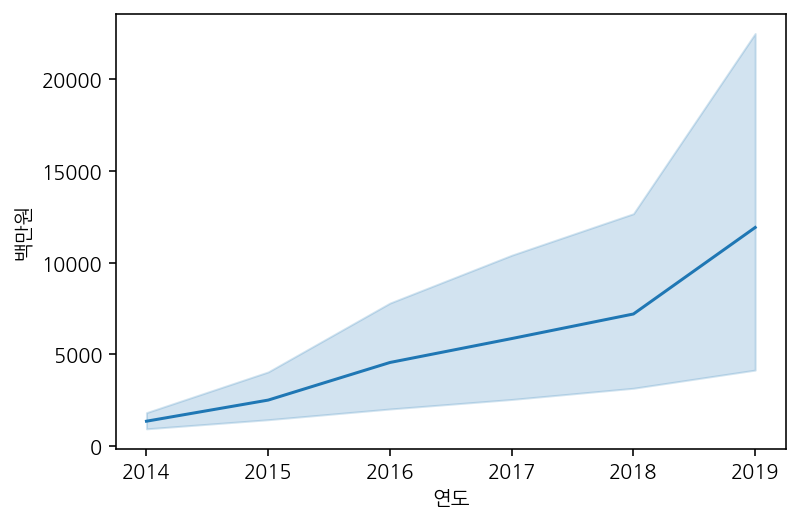

In [ ]:
# 연도, 판매액 lineplot
sns.lineplot(data=df_total, x='연도', y='백만원')
plt.show()

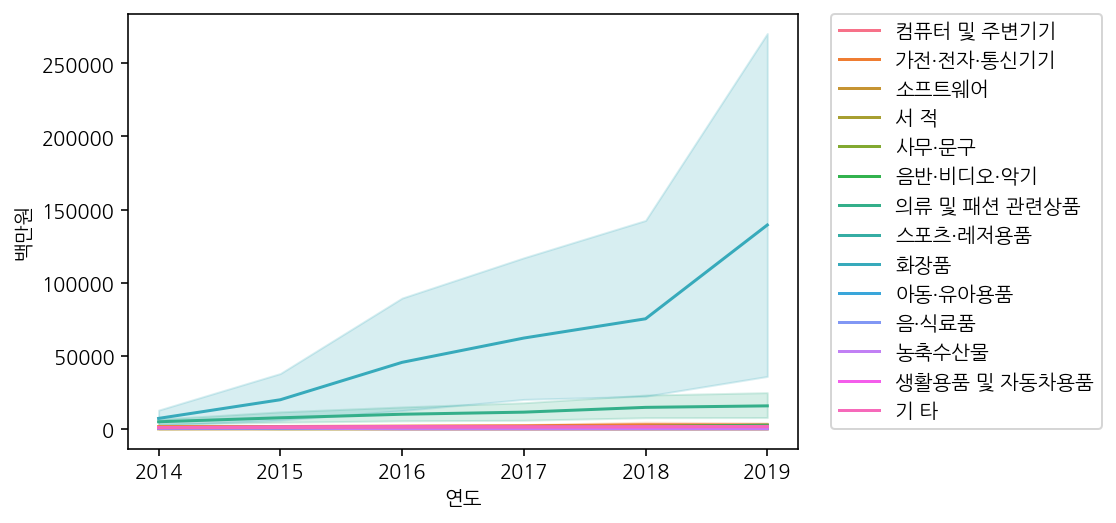

In [ ]:
sns.lineplot(data=df_total, x='연도', y='백만원',
             hue='상품군별')

#legend 그래프밖에 표기하기
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<Figure size 720x576 with 0 Axes>

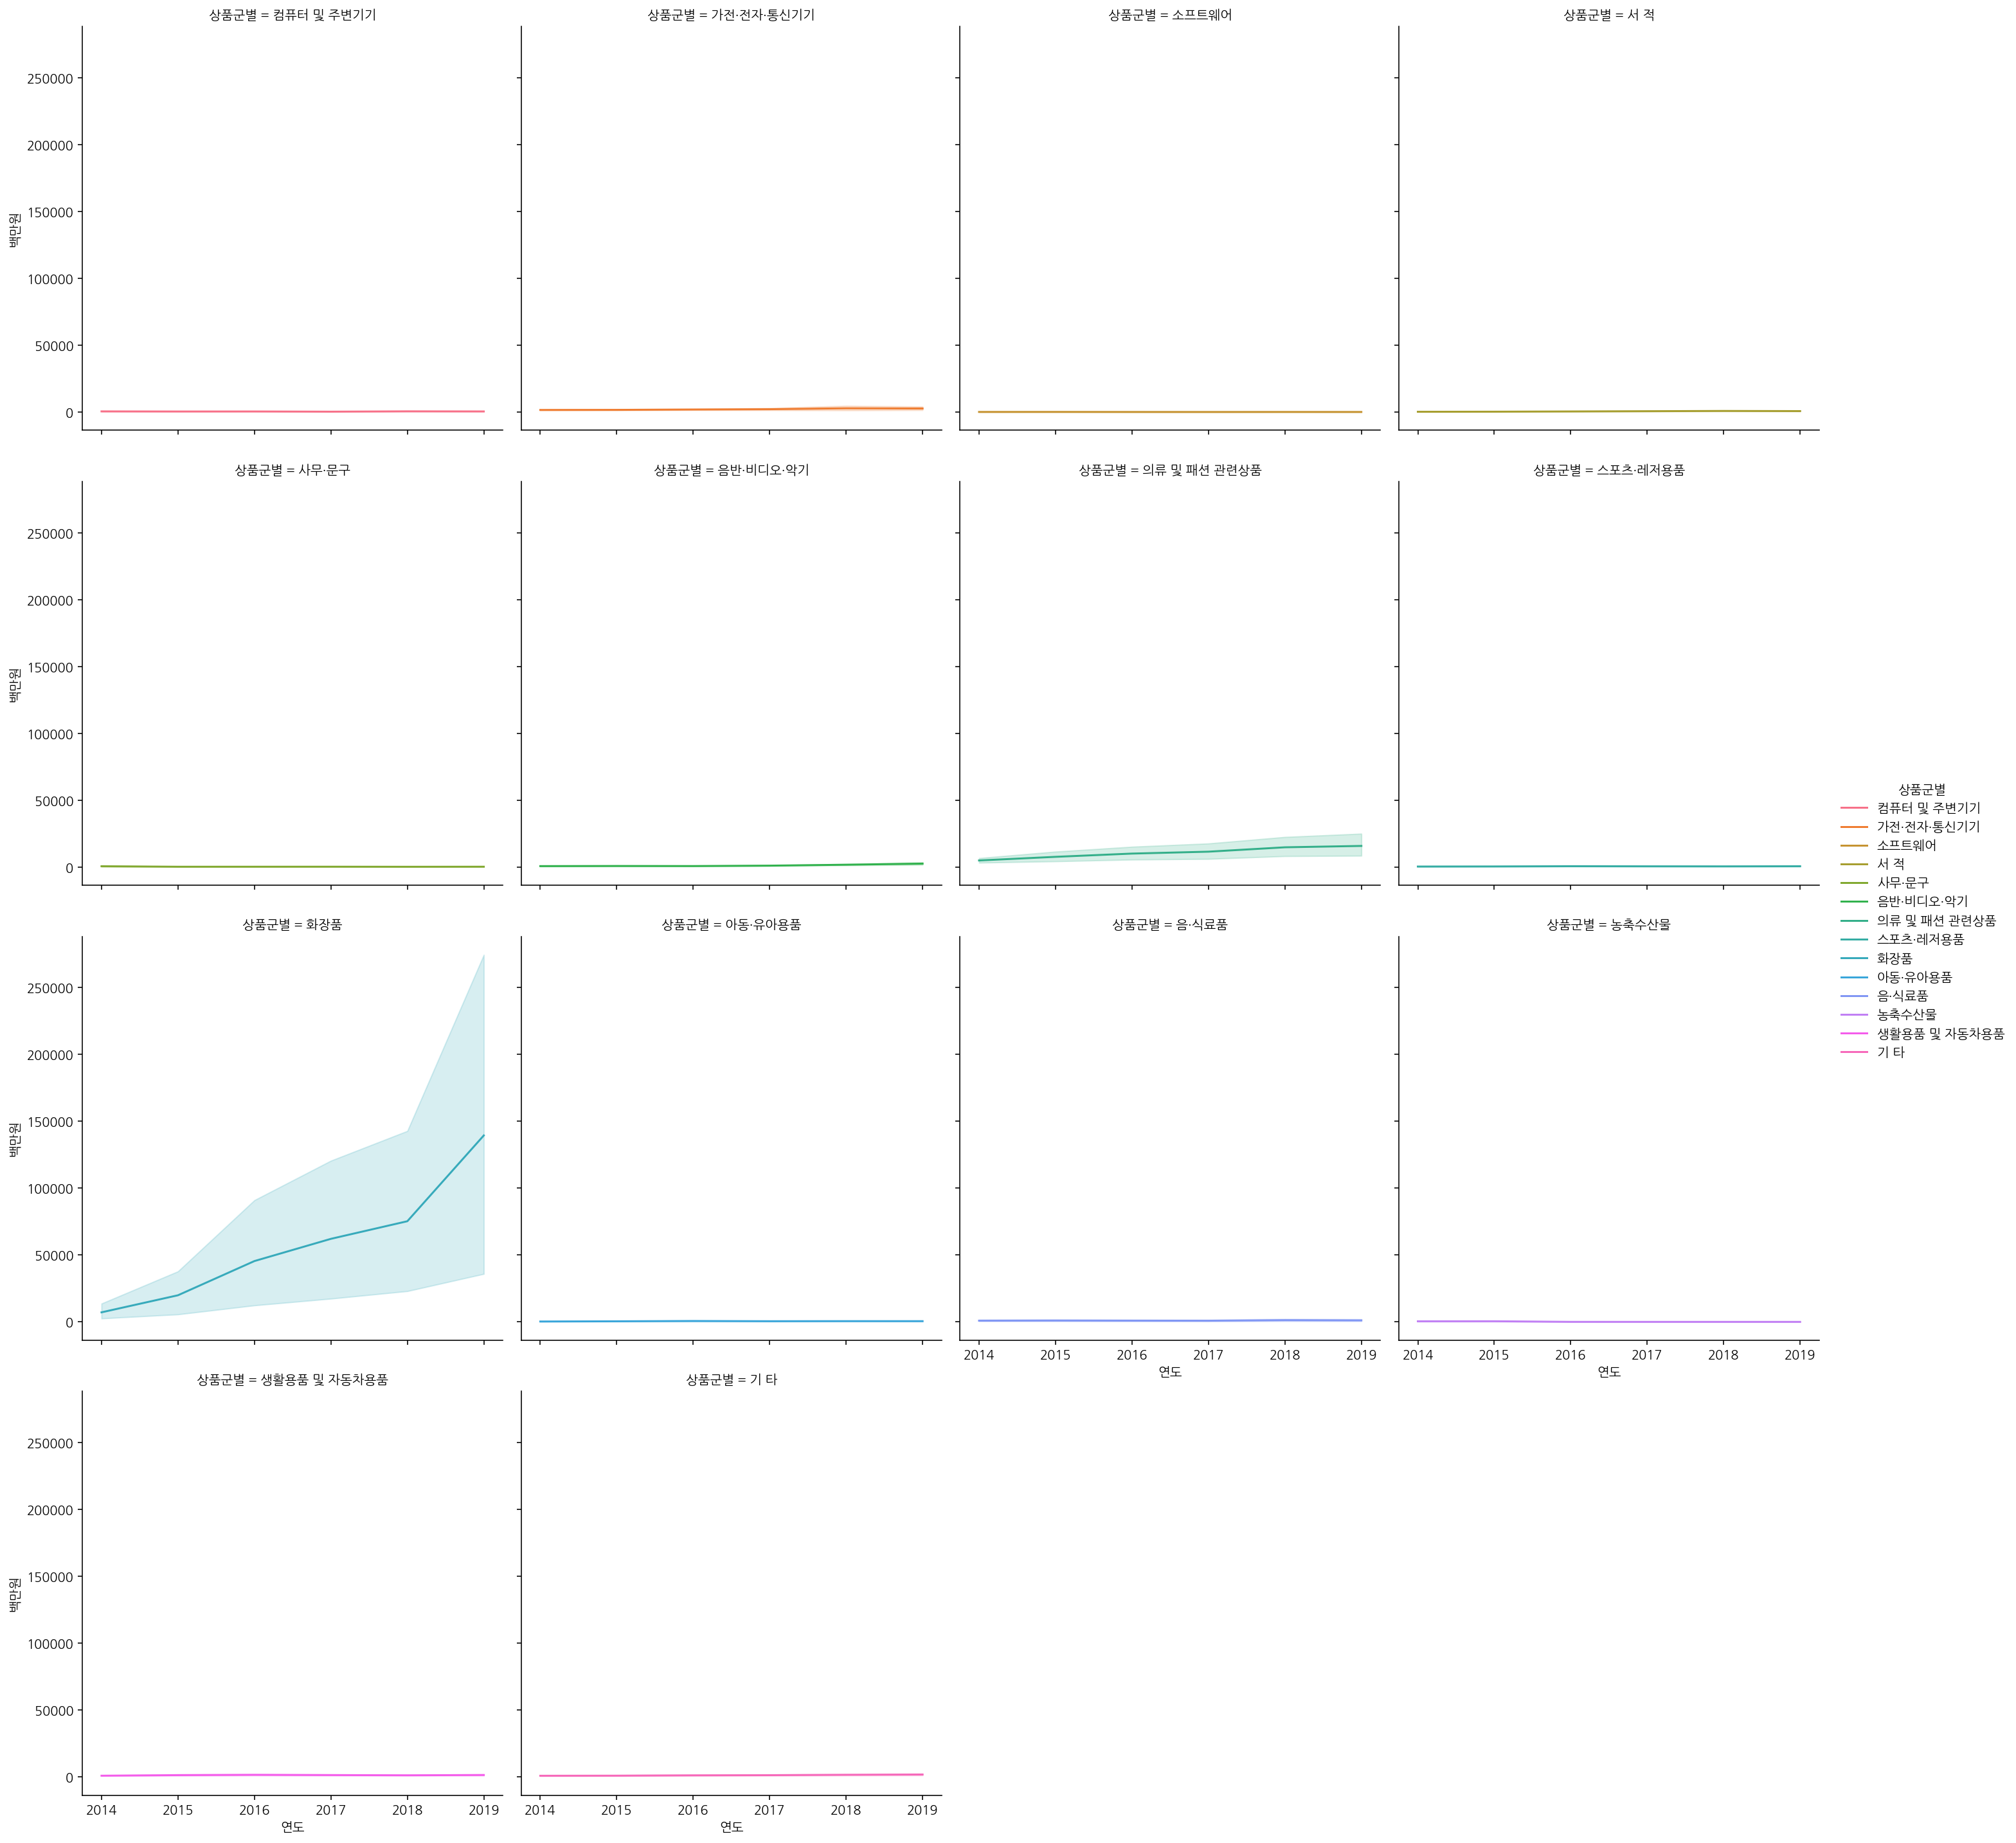

In [ ]:
#위 그래프를 자세히 보기 위해 서브플롯으로 표시
plt.figure(figsize=(10, 8))
sns.relplot(data=df_total, x='연도', y='백만원',
            hue='상품군별', kind='line', col='상품군별',
            col_wrap=4)
plt.show()

In [ ]:
# isin을 사용해 화장품만 제외
df_sub = df_total[~df_total['상품군별'].isin(['화장품', '의류 및 패션 관련상품'])].copy()

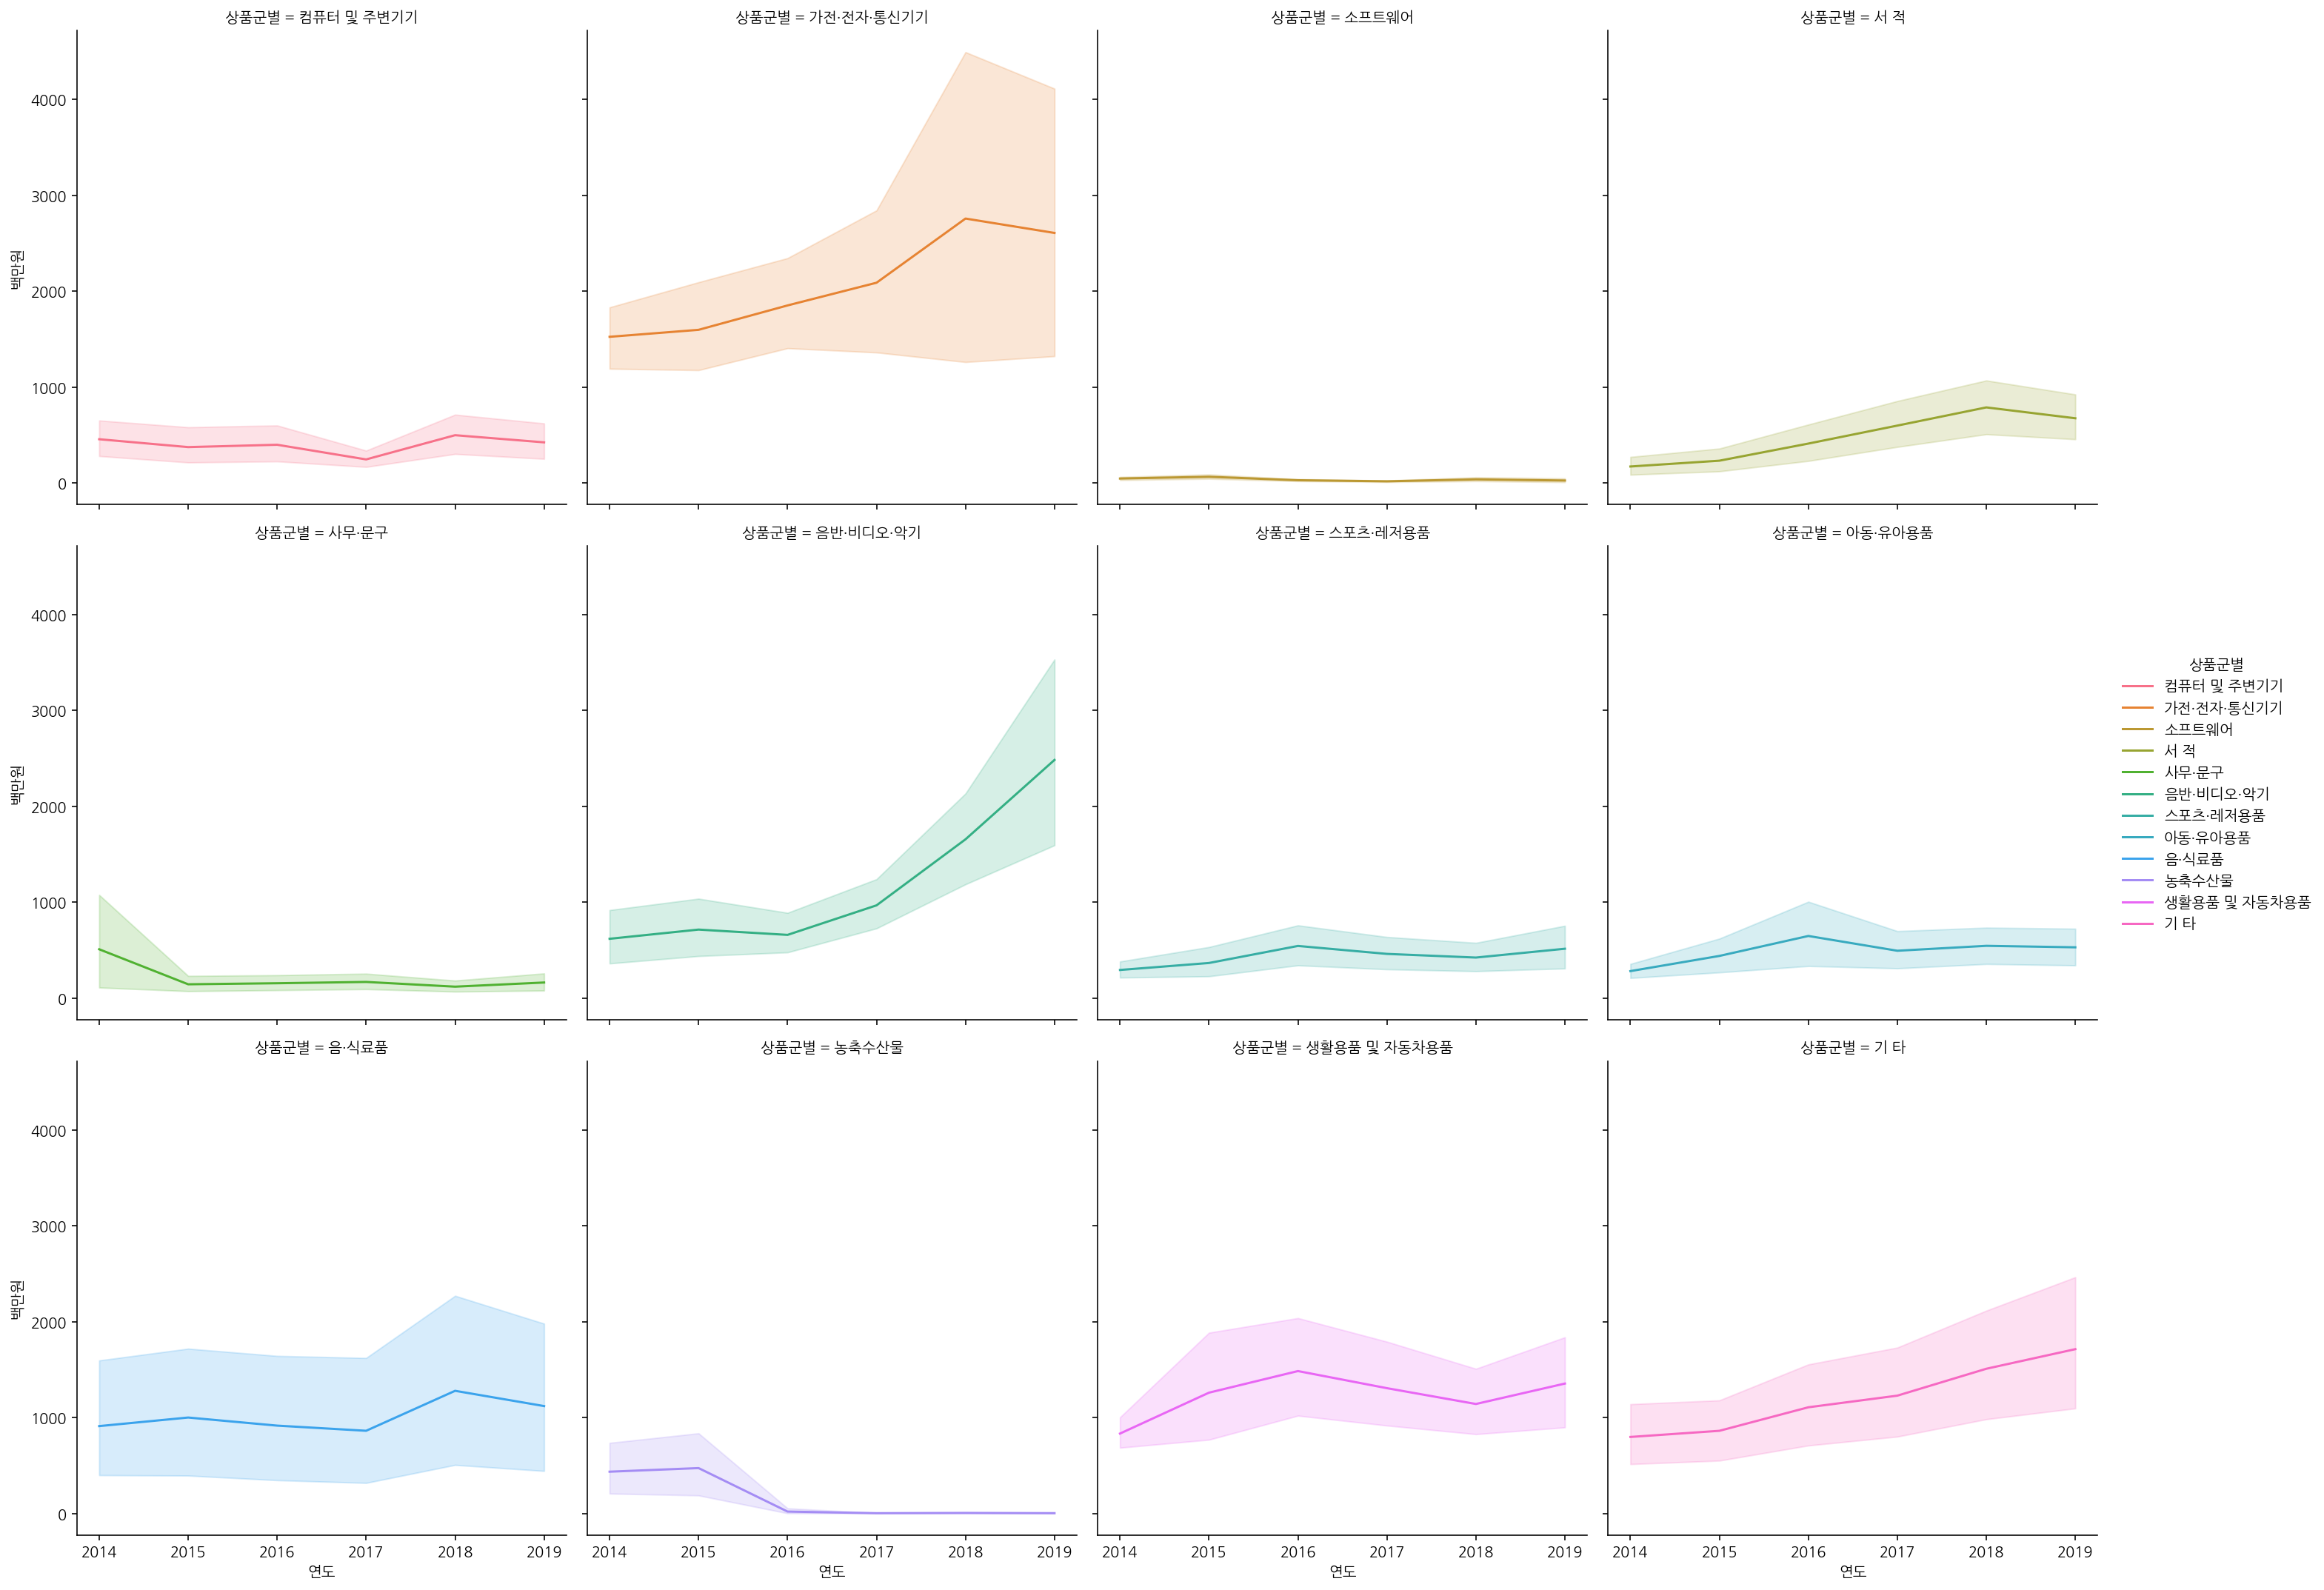

In [ ]:
sns.relplot(data=df_sub, x='연도', y='백만원',
            hue='상품군별', col='상품군별',
            col_wrap=4, kind='line')
plt.show()

### 화장품의 온라인쇼핑 해외직접 판매액

In [ ]:
df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()

In [ ]:
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

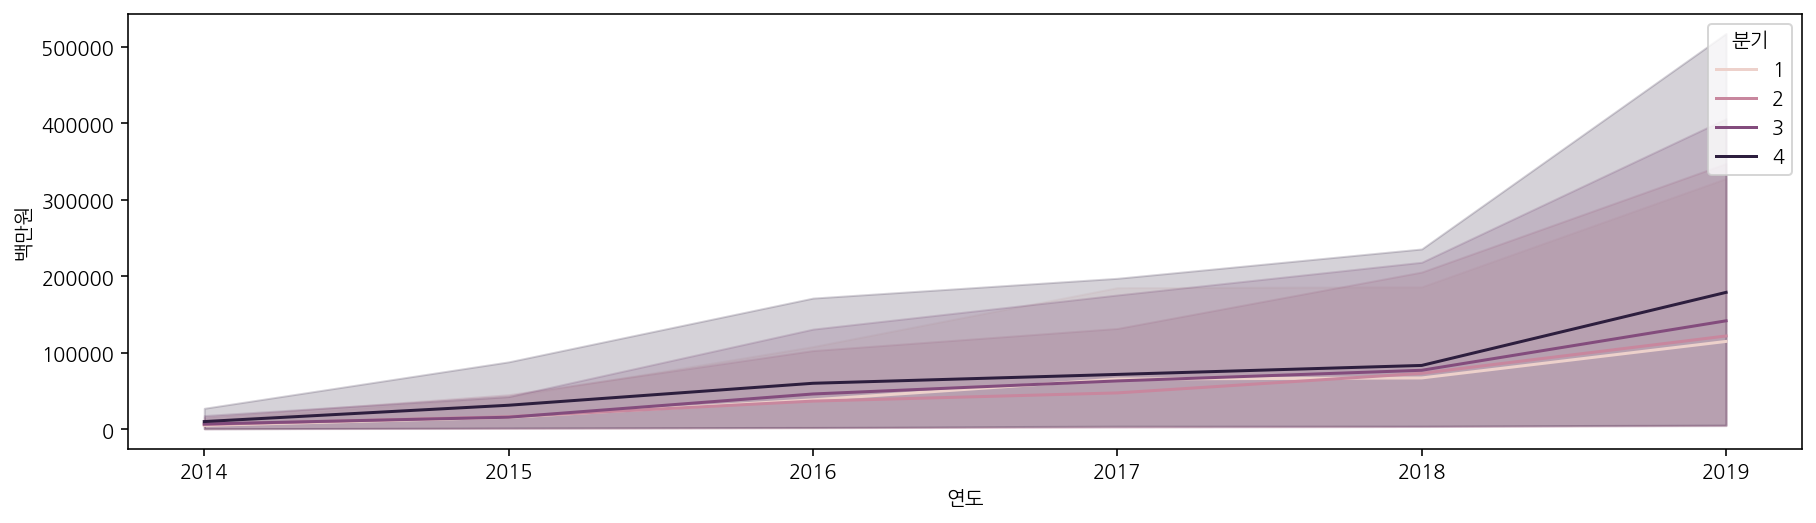

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x='연도', y='백만원',
             hue='분기')
plt.show()

# 1분기보다 4분기가 높은건, 계속 성장하고 있기 때문.

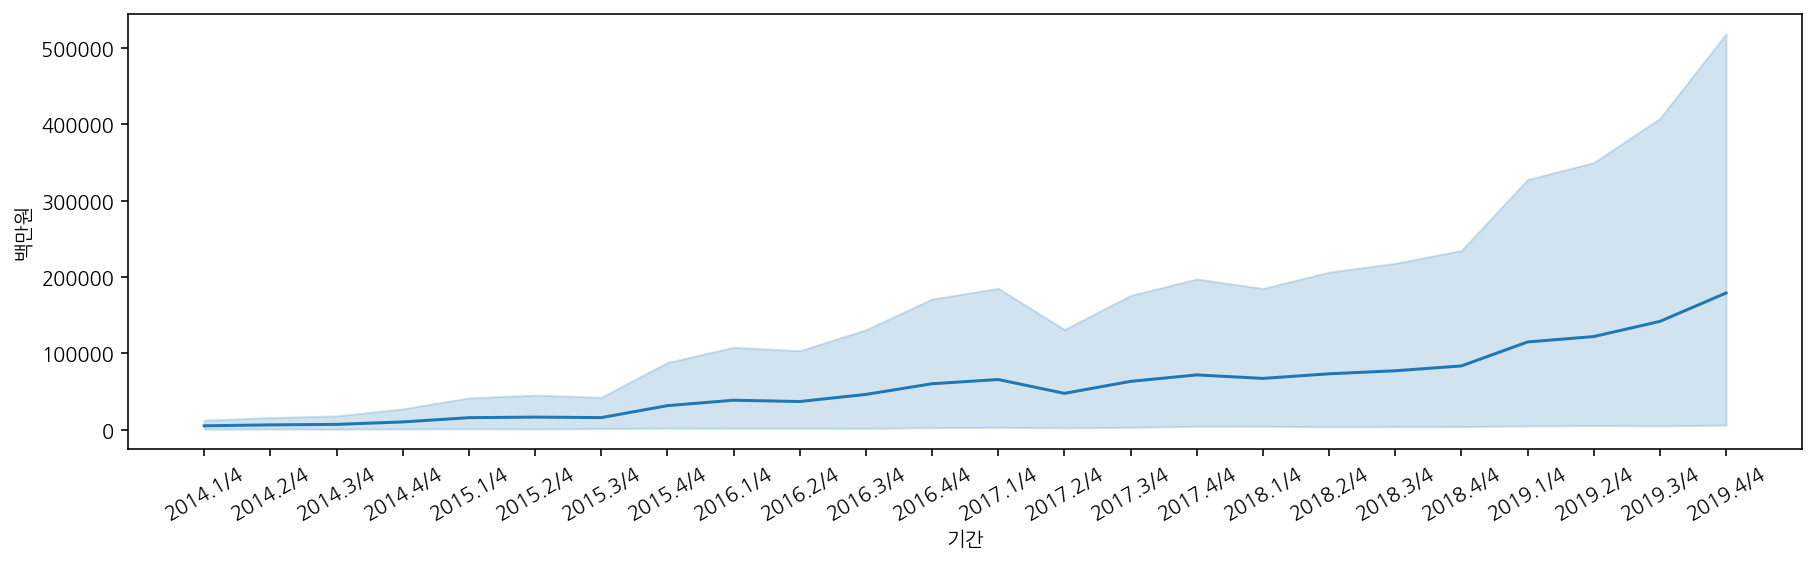

In [ ]:
# 화장품 판매액 기간별 금액 데이터 시각화
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원')
plt.show()

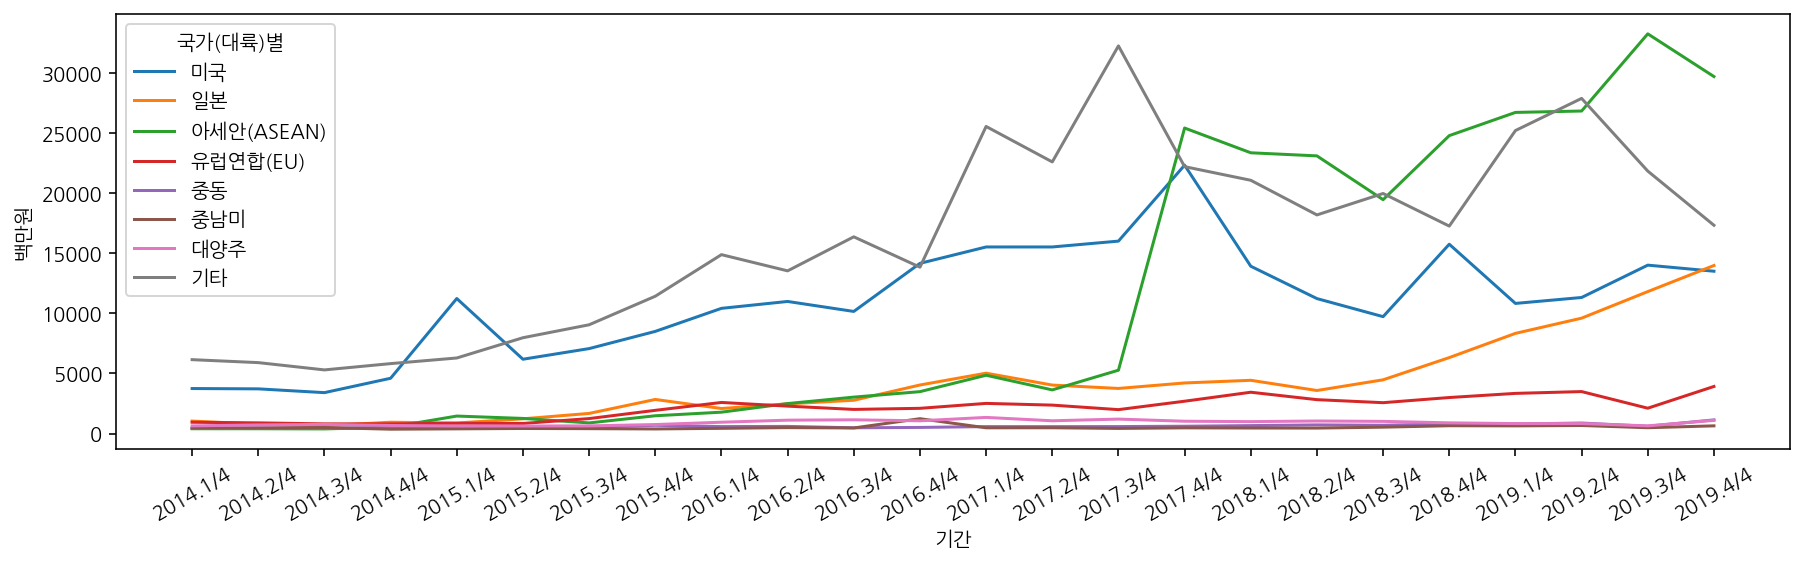

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'], x='기간', y='백만원',
             hue='국가(대륙)별')
# 중국이 너무 압도적이어서, 다른 나라가 잘 안보임. 
# 중국제외하고 시각화
plt.show()

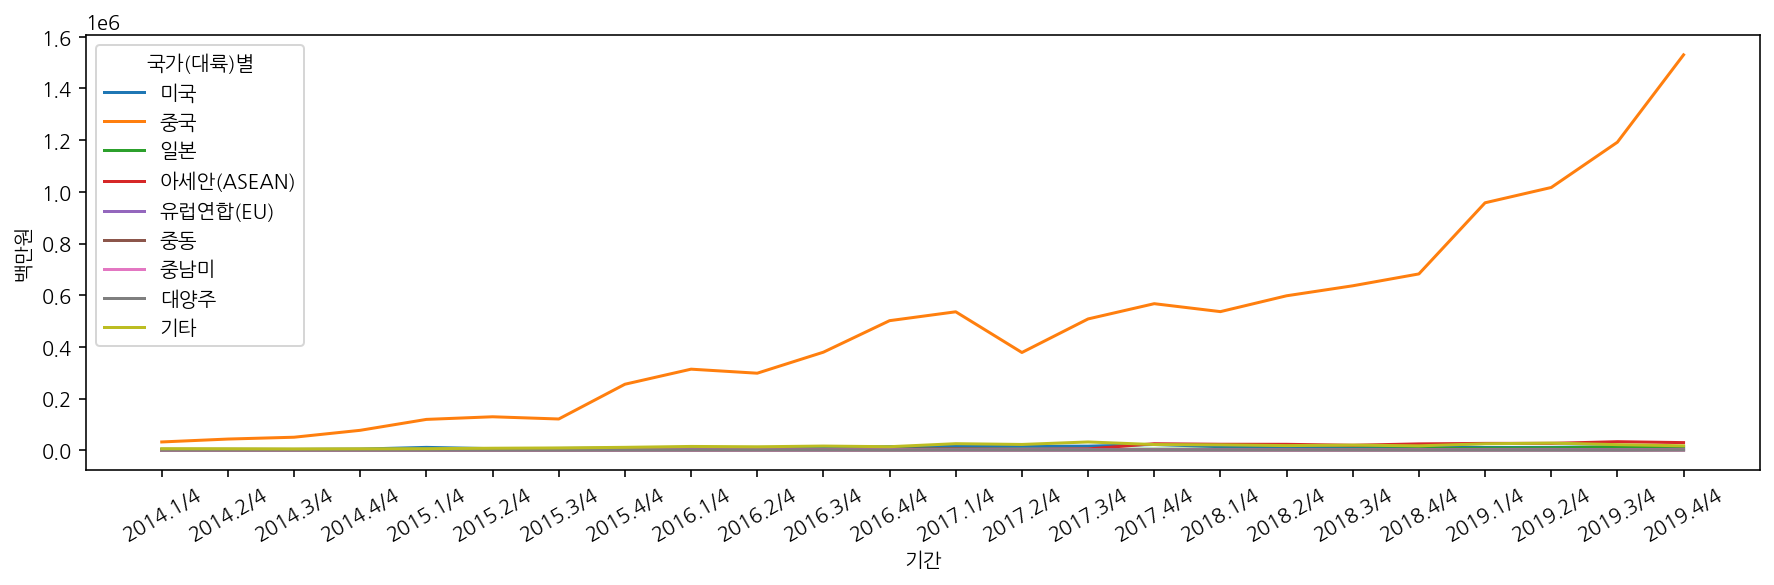

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원',
             hue='국가(대륙)별')
plt.show()

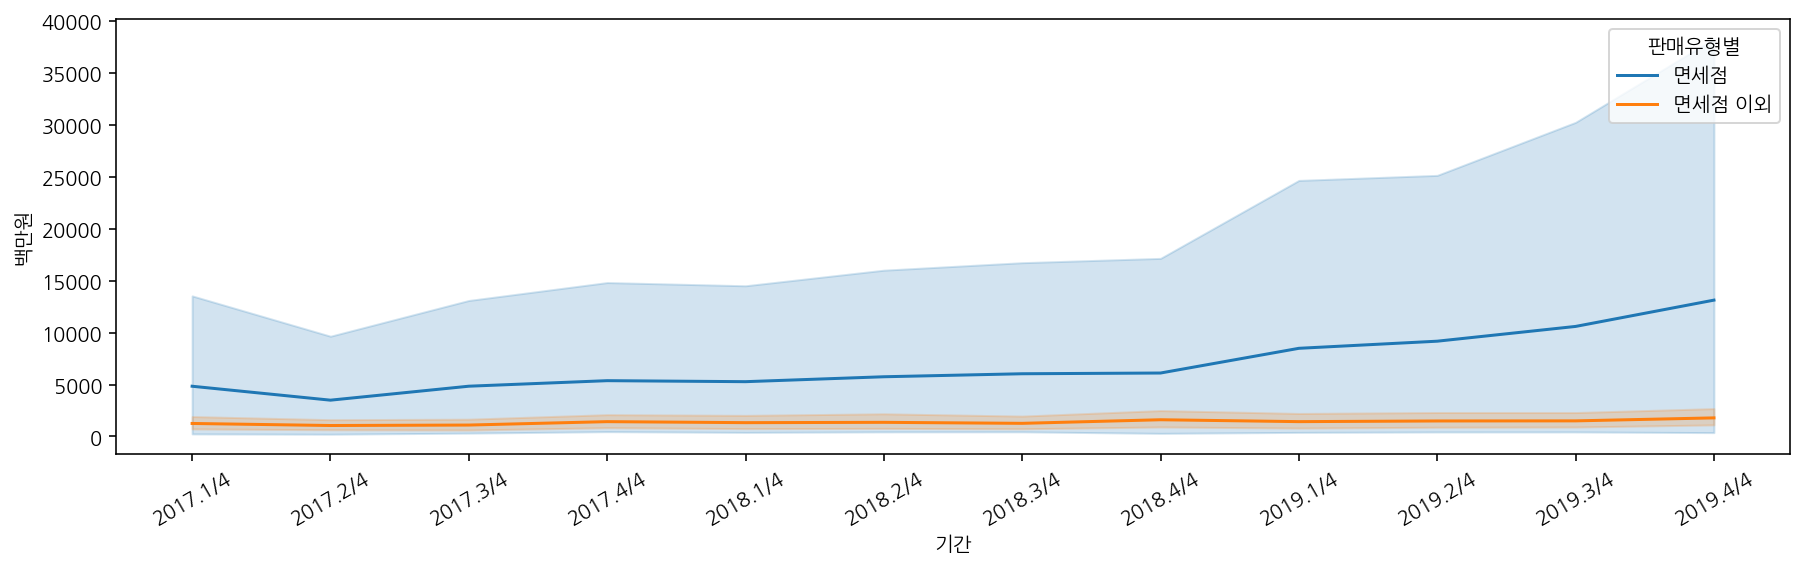

In [ ]:
# 화장품 판매액 기나별 금액 데이터 시각화, 판매유형별 다른 색상 시각화
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[df['판매유형별'] != '계'].copy()
sns.lineplot(data=df_sub, x='기간', y='백만원',
             hue='판매유형별')
plt.show()

#온라인 면세점이 많이 성장함을 알 수 있음.

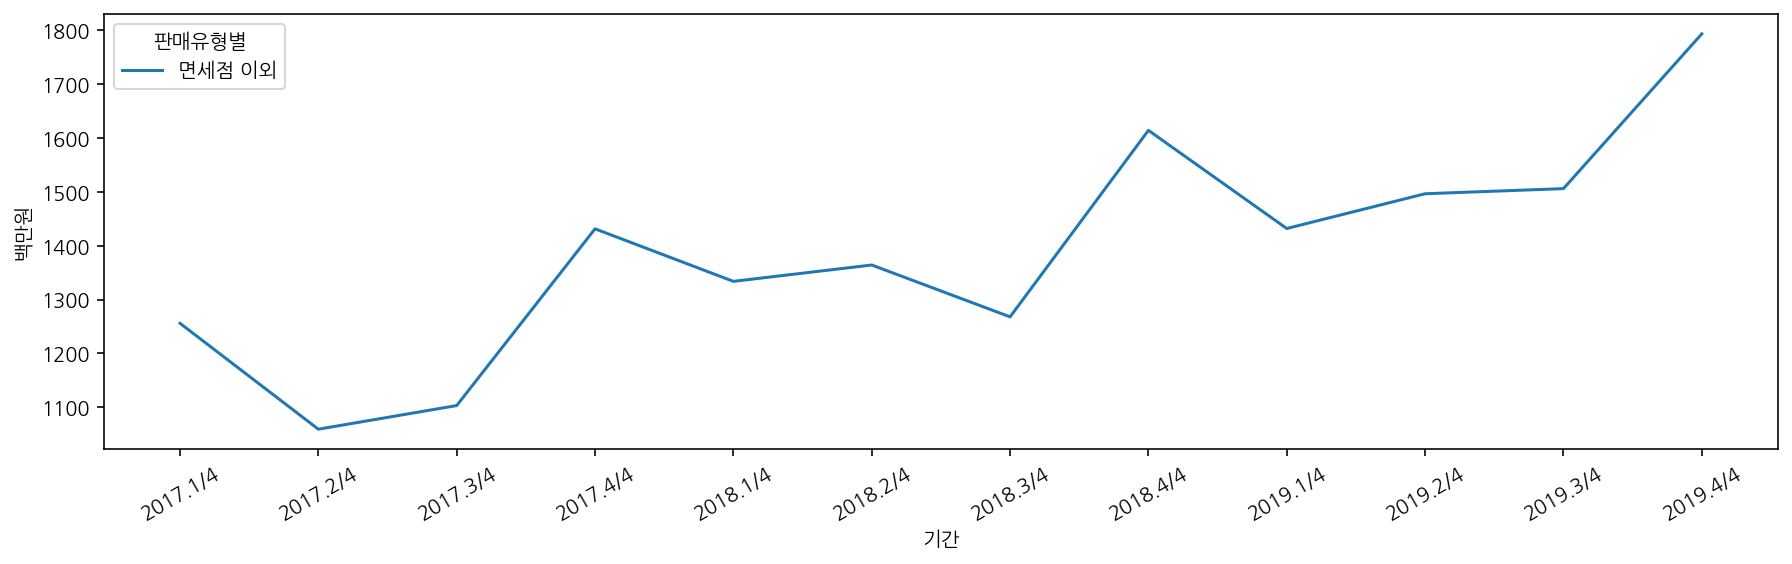

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[(df['판매유형별'] != '계') & (df['판매유형별'] != '면세점' )].copy()
sns.lineplot(data=df_sub, x='기간', y='백만원',
             hue='판매유형별', ci=None)
plt.show()

# 면세점 이외에도 성장하고 있다.

## 패션 의류 온라인 해외 직접판매액 시각화

In [ ]:
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별']=='계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


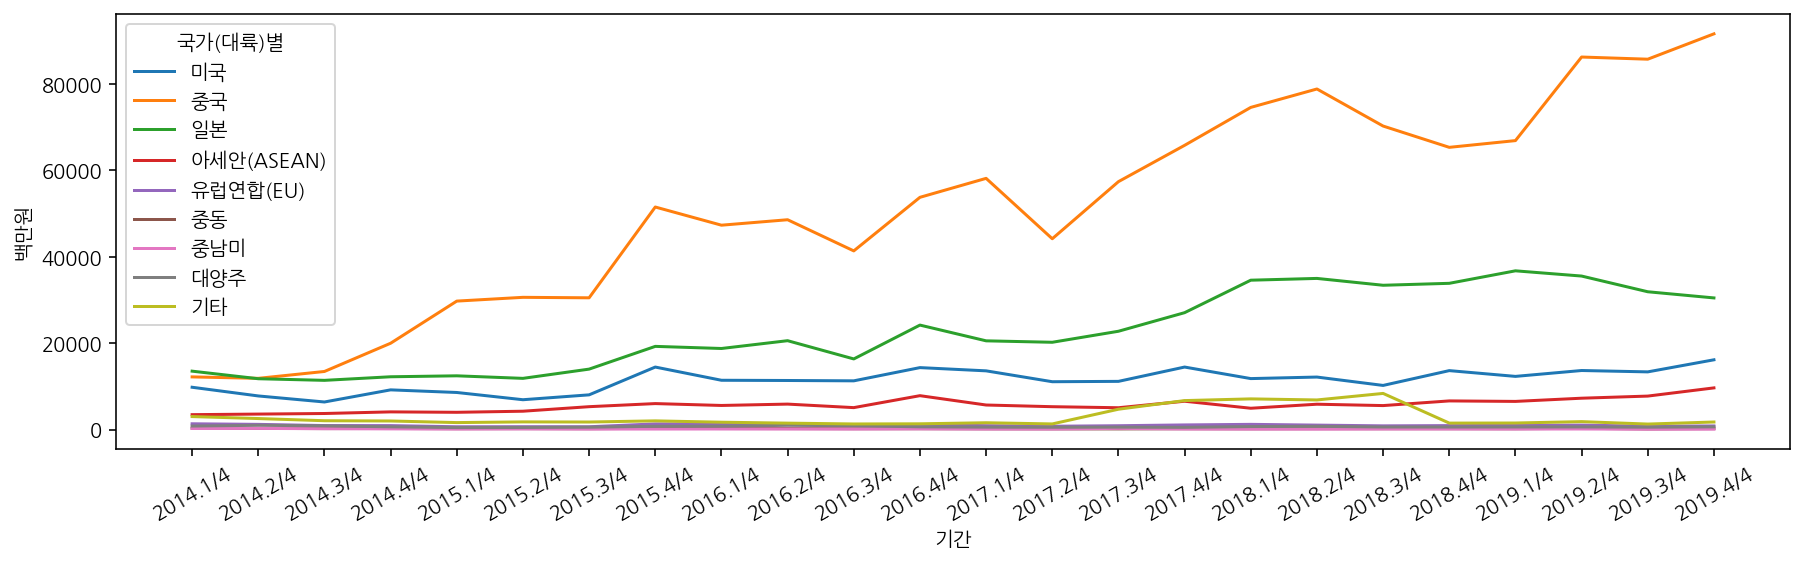

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간', y='백만원',
             hue='국가(대륙)별')
plt.show()

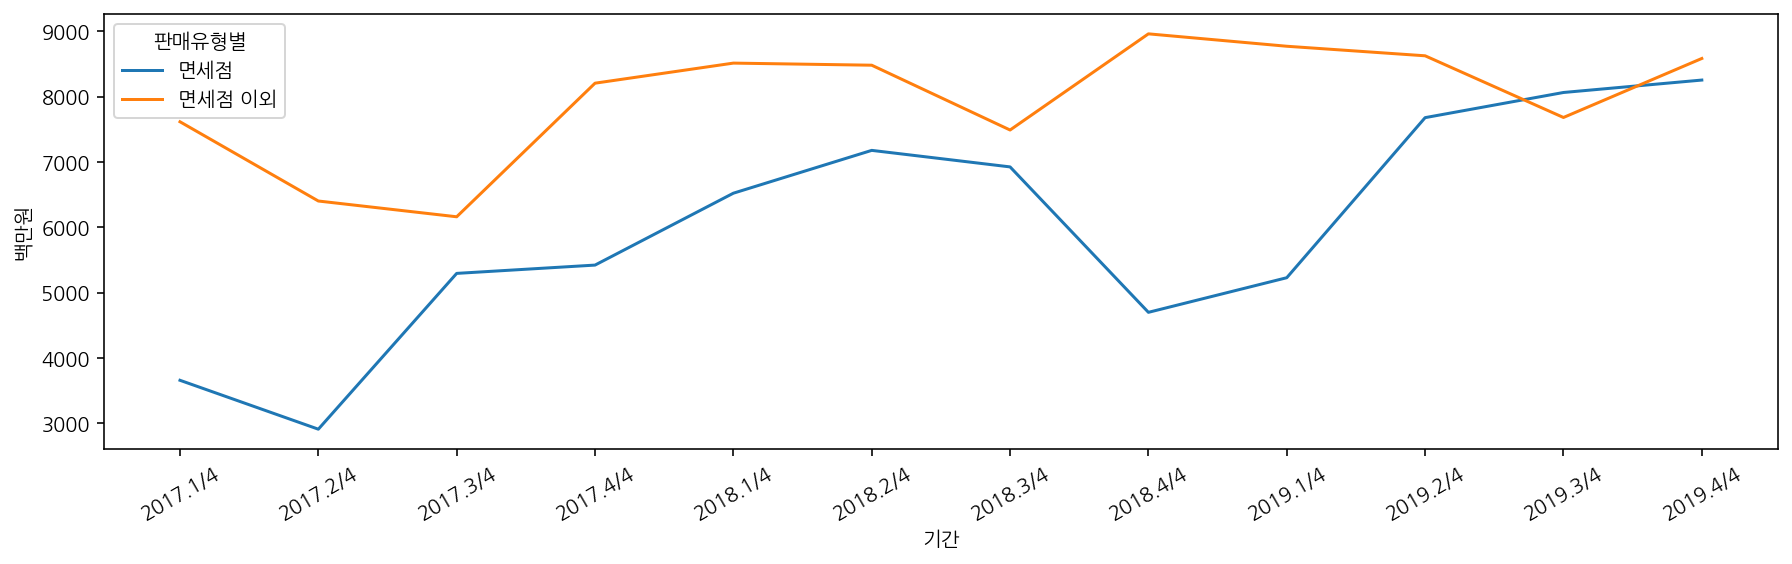

In [ ]:
df_fashion2 = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] != '계')].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x='기간', y='백만원',
             hue='판매유형별', ci=None)
plt.show()

### 데이터 집계하기

In [ ]:
# 국가(대륙)별, 연도별 합계 금액 표로

df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1


In [ ]:
df_fashion.pivot_table(index='국가(대륙)별',
                       columns='연도', values='백만원')
# 평균 금액을 의미.

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,2420.75,1812.00,1479.50,3596.75,5975.25,1618.75
대양주,848.00,587.25,850.25,566.50,681.25,622.25
미국,8305.75,9516.50,12112.75,12588.25,11968.75,13884.00
아세안(ASEAN),3734.00,4909.75,6119.50,5667.75,5767.00,7811.75
유럽연합(EU),1121.25,843.50,1224.75,934.00,1028.50,923.50
일본,12240.00,14398.50,19976.25,22646.00,34200.00,33659.25
중국,14382.75,35584.75,47733.00,56351.75,72212.00,82566.75
중남미,243.75,154.00,162.25,190.50,144.00,136.00
중동,293.00,254.50,242.00,193.00,219.75,237.75


In [ ]:
result = df_fashion.pivot_table(index='국가(대륙)별',
                       columns='연도', values='백만원',
                       aggfunc='sum')
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


In [ ]:
df_fashion['판매유형별'].value_counts()

계    216
Name: 판매유형별, dtype: int64

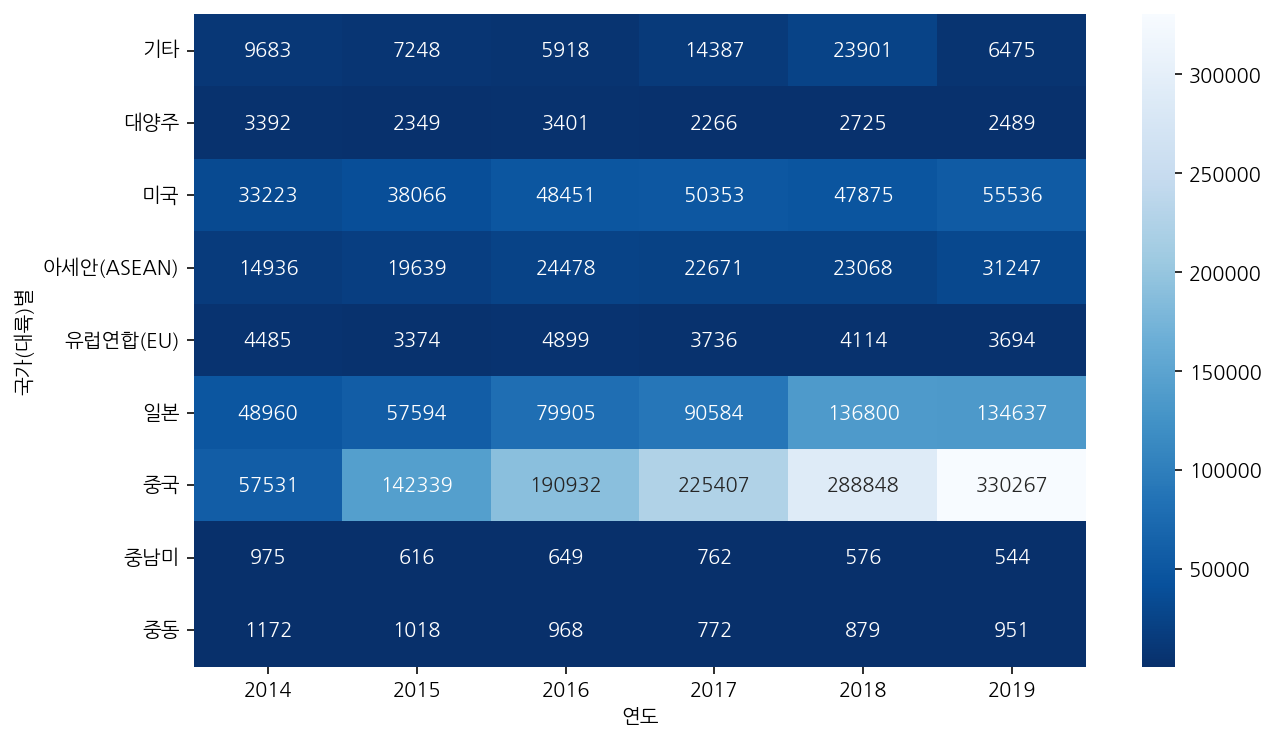

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap='Blues_r', annot=True, fmt='.0f')
plt.show()
# 2019년으로 갈수록, 중국에서 구매가 많이 일어남.

# 전체 상품군별로 온라인 쇼핑 해외직접판매액은 증가했을까?

In [ ]:
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


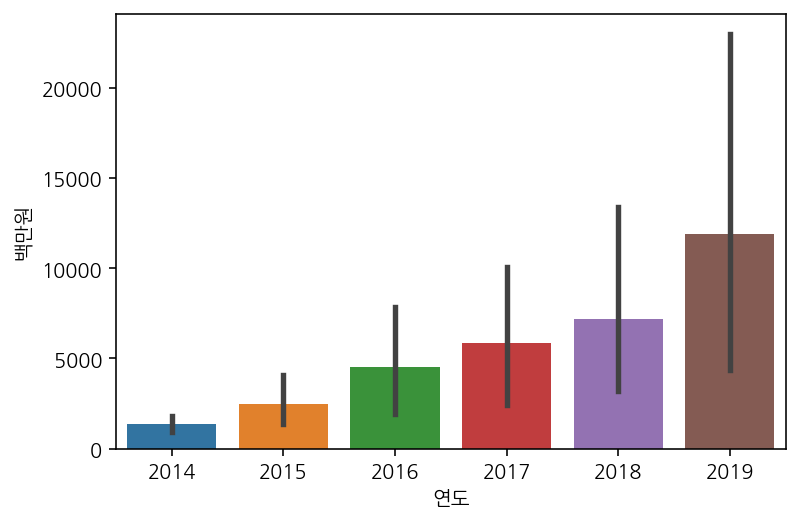

In [ ]:
sns.barplot(data=df_total, x='연도', y='백만원')
plt.show()
# 평균값을 그림.

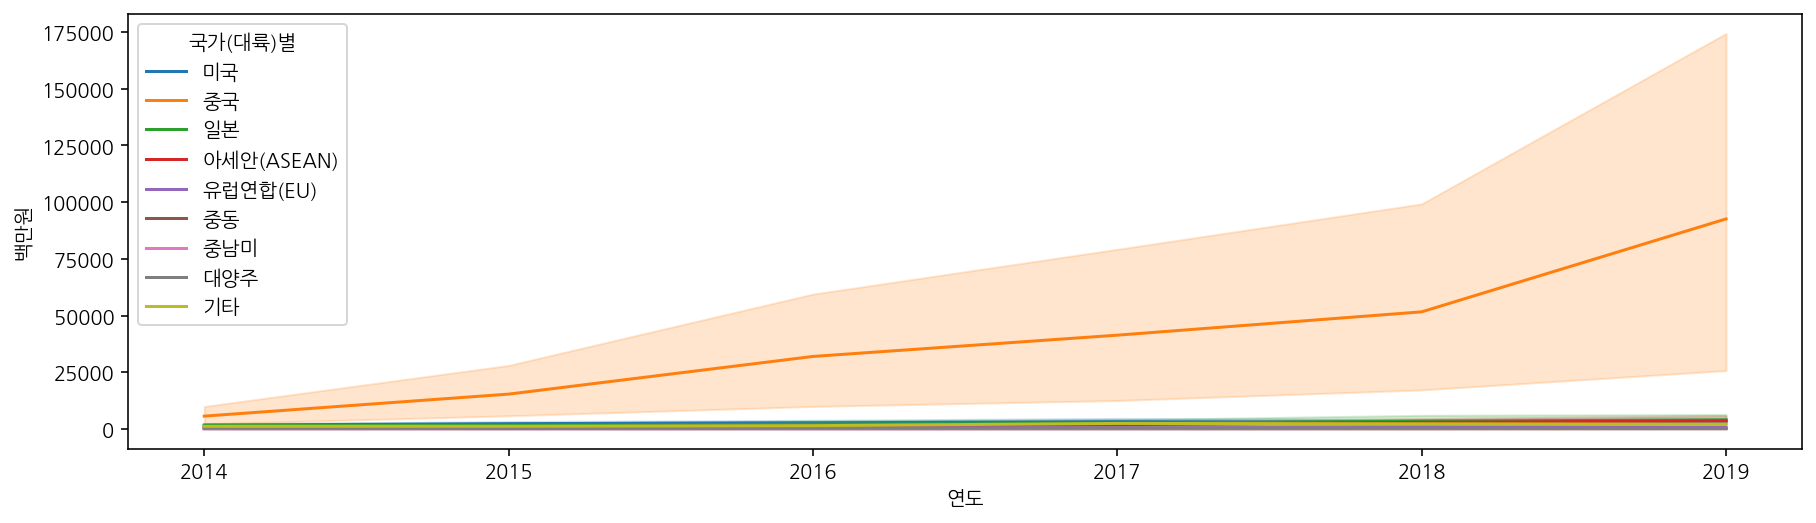

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x='연도', y='백만원',
            hue='국가(대륙)별')
plt.show()

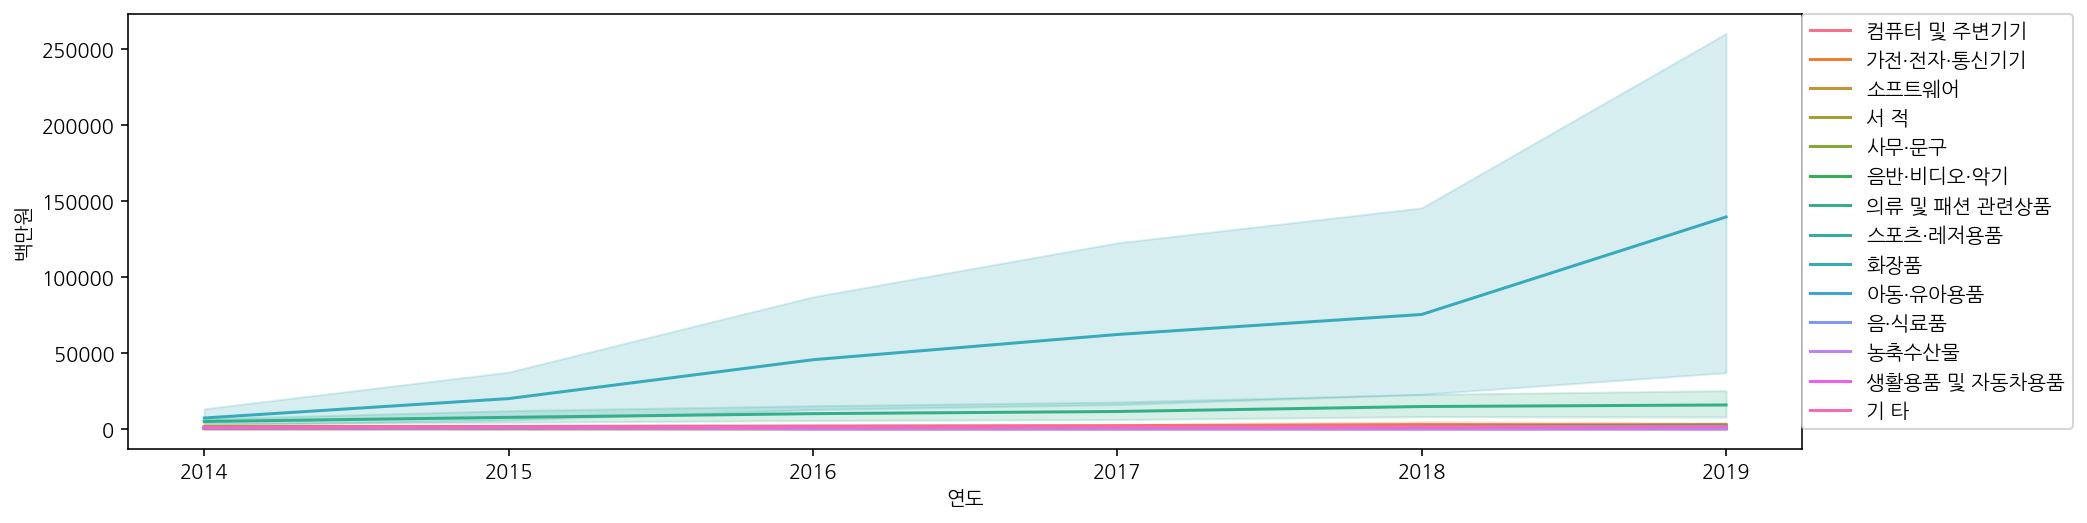

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x='연도', y='백만원',
            hue='상품군별')

#legend 그래프밖에 그리기
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()